## Chapter 2: The Simple Linear Regression Model

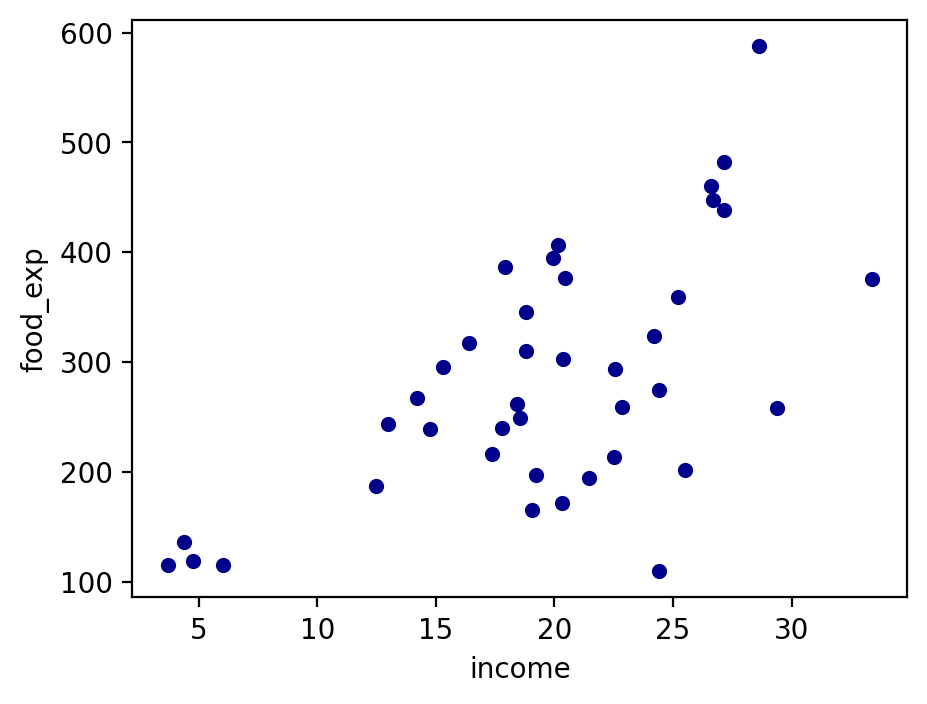

In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd

poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
food = pd.read_csv(poe5csv+'food.csv')

food.plot.scatter(x='income', y='food_exp',c='DarkBlue');

In [2]:
food.head()

,food_exp,income
0,115.22,3.69
1,135.98,4.39
2,119.34,4.75
3,114.96,6.03
4,187.05,12.47


In [3]:
food.food_exp.head(3)

0    115.22
1    135.98
2    119.34
Name: food_exp, dtype: float64

In [4]:
food['food_exp'].head(3)

0    115.22
1    135.98
2    119.34
Name: food_exp, dtype: float64

In [5]:
food[['food_exp','income']].head(3)

,food_exp,income
0,115.22,3.69
1,135.98,4.39
2,119.34,4.75


In [6]:
food['food_exp'][food.income<10]

0    115.22
1    135.98
2    119.34
3    114.96
Name: food_exp, dtype: float64

In [7]:
food.describe()

,food_exp,income
count,40.000000,40.000000
mean,283.573500,19.604750
std,112.675181,6.847773
min,109.710000,3.690000
25%,200.377500,17.110000
50%,264.480000,20.030000
75%,363.325000,24.397500
max,587.660000,33.400000


In [8]:
food.describe(percentiles=[0.1,0.2,0.5,0.8,0.9])

,food_exp,income
count,40.000000,40.000000
mean,283.573500,19.604750
std,112.675181,6.847773
min,109.710000,3.690000
10%,134.316000,11.826000
20%,192.890000,15.208000
50%,264.480000,20.030000
80%,378.946000,25.260000
90%,439.237000,27.142000
max,587.660000,33.400000


In [9]:
print(f"N_obs    = {len(food.food_exp):d}")
print(f"Mean     = {food.food_exp.mean():.2f}")
print(f"Std.Dev. = {food.food_exp.std():.2f}")
print(f"Median   = {food.food_exp.median():.2f}")
print(f"Variance = {food.food_exp.var():.1f}")

N_obs    = 40
Mean     = 283.57
Std.Dev. = 112.68
Median   = 264.48
Variance = 12695.7


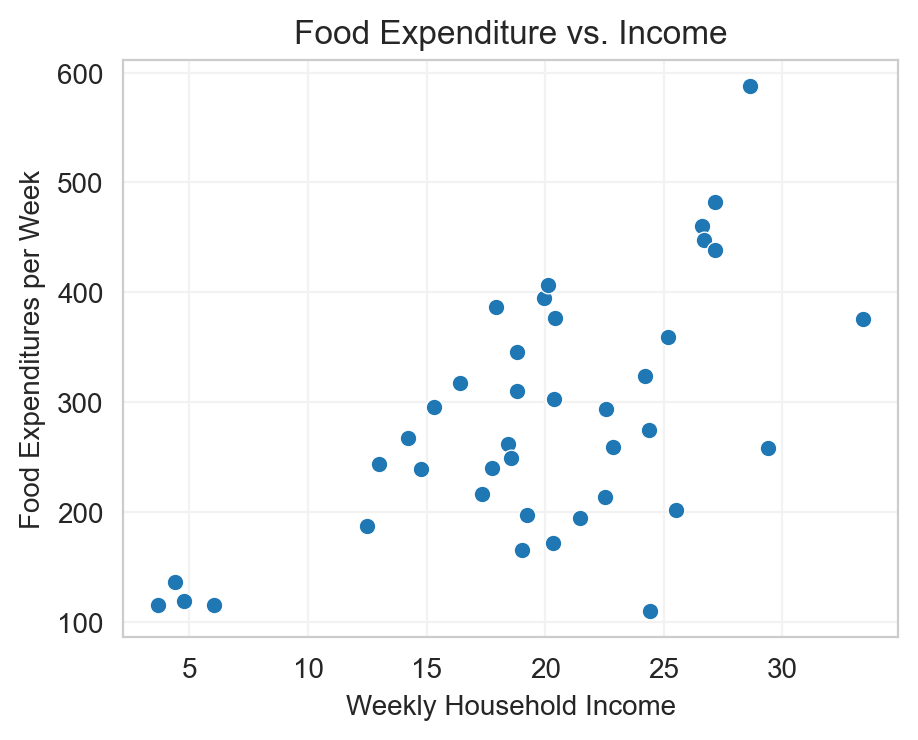

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  ; sns.set_style('whitegrid',  {"grid.color": '.95'})

ax = sns.scatterplot(x=food.income,y=food.food_exp)
ax.set_xlabel("Weekly Household Income")
ax.set_ylabel("Food Expenditures per Week")
ax.set_title("Food Expenditure vs. Income");

Fit coefficients:
      b1 =83.42
      b2 =10.21


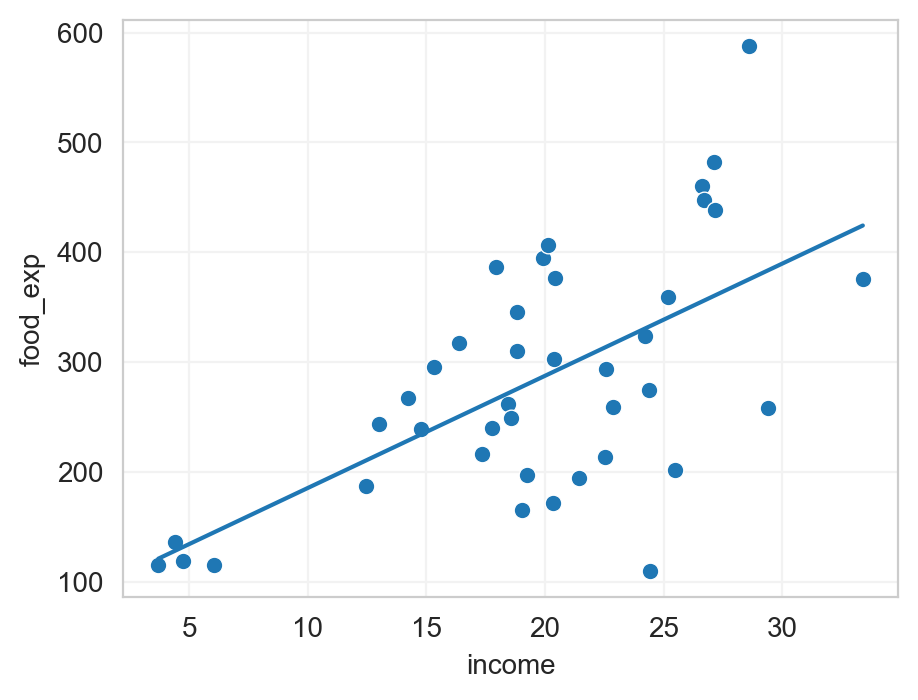

In [11]:
import numpy as np

c = np.polyfit(food.income,food.food_exp,1)
print(f"Fit coefficients:\n\
      b1 ={c[1]:.2f}\n\
      b2 ={c[0]:.2f}")

ax = sns.scatterplot(x=food.income,y=food.food_exp)
plt.plot(food.income,np.poly1d(c)(food.income));

In [12]:
import statsmodels.api as sm

food['const'] = 1  # Add a new column to dataframe 'food'
food.head()        # Show the new column

,food_exp,income,const
0,115.22,3.69,1
1,135.98,4.39,1
2,119.34,4.75,1
3,114.96,6.03,1
4,187.05,12.47,1


In [13]:
results = sm.OLS(endog=food['food_exp'],
                 exog=food[['const','income']]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     23.79
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.95e-05
Time:                        09:32:48   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.0

In [14]:
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.062      -4.463     171.295
income        10.2096      2.093      4.877      0.000       5.972      14.447


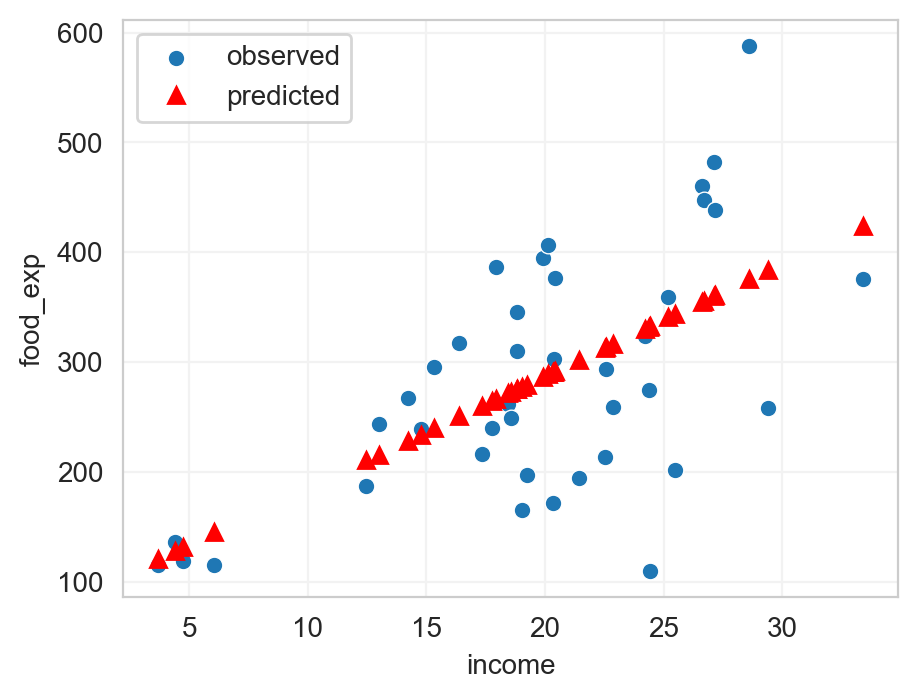

In [15]:
ax = sns.scatterplot(x=food.income,y=food.food_exp,label="observed")
plt.plot(food.income,results.predict(),'r^',alpha=1.0,
         label="predicted")
plt.legend();

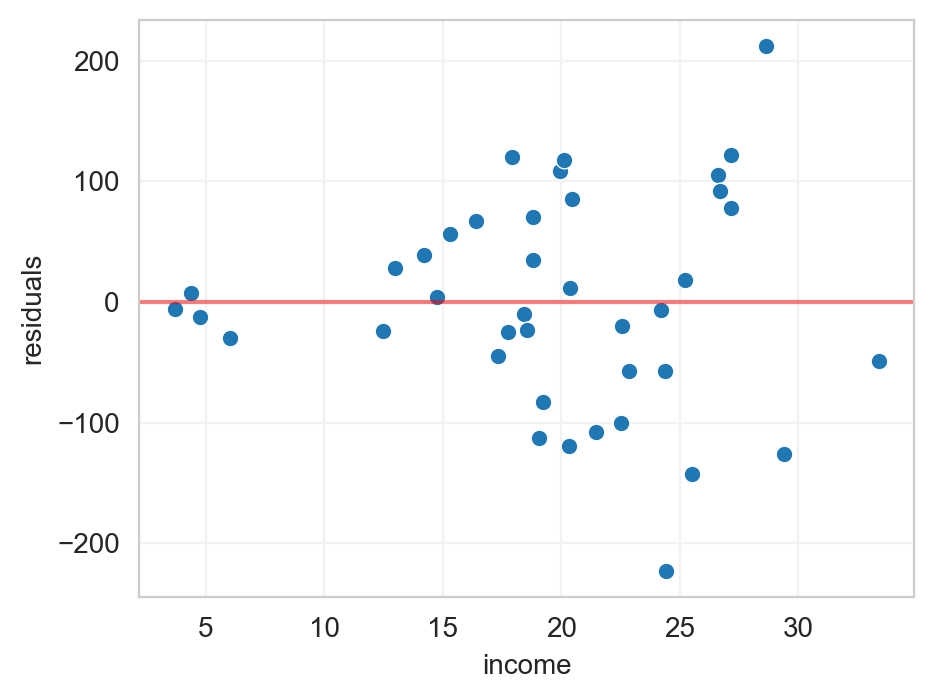

In [16]:
ax = sns.scatterplot(x=food.income,y=results.resid)
plt.axhline(0,c='r',alpha=0.5)
ax.set_ylabel("residuals");

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.062      -4.463     171.295
income        10.2096      2.093      4.877      0.000       5.972      14.447


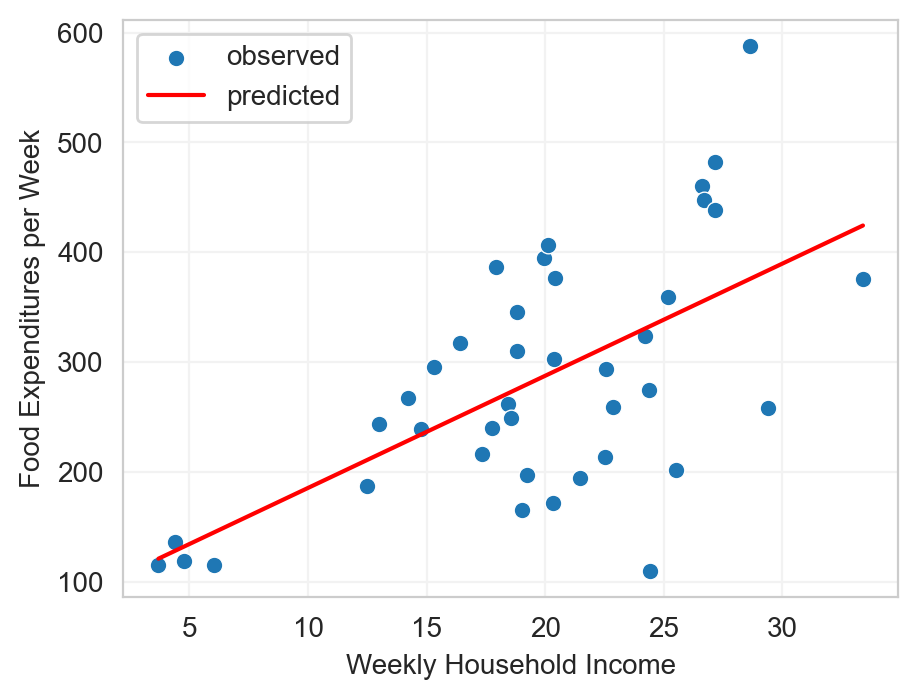

In [17]:
# import all needed packages
import pandas as pd           
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_style('whitegrid',  {"grid.color": '.95'})
import statsmodels.api as sm

# fetch the data
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
food = pd.read_csv(poe5csv+'food.csv')

# statmodels fitting
food['const'] = 1                 
results = sm.OLS(endog=food['food_exp'],
                 exog=food[['const','income']]).fit()

# make the plot
ax = sns.scatterplot(x=food.income,y=food.food_exp,label="observed")
plt.plot(food.income,results.predict(),'r',label="predicted")
ax.set_xlabel("Weekly Household Income")
ax.set_ylabel("Food Expenditures per Week")
plt.legend()

# output partial table of results
print(results.summary().tables[1])

In [18]:
print(results.params)

const     83.416002
income    10.209643
dtype: float64


In [19]:
print(results.bse)

const     43.410163
income     2.093264
dtype: float64


In [20]:
def my_predict(income):
    slope = results.params.income
    intercept = results.params.const
    return intercept + slope*income

print(f"{my_predict(20):.2f}")       # predict for a single value

new_income = np.array([5,10,20,40])  # predict for a new sample of values
for i in new_income:
    print(f"For income = {i:5.2f} predict expense = {my_predict(i):6.2f}")

287.61
For income =  5.00 predict expense = 134.46
For income = 10.00 predict expense = 185.51
For income = 20.00 predict expense = 287.61
For income = 40.00 predict expense = 491.80


In [21]:
print(results.cov_params())

              const     income
const   1884.442263 -85.903157
income   -85.903157   4.381752


In [22]:
elas = results.params.income * food.income.mean()/food.food_exp.mean()
print(f"Elasticity = {elas:.3f}")

Elasticity = 0.706


In [23]:
br = pd.read_csv(poe5csv+'br.csv')
print(br.columns,'\n')
print(br[['price','sqft']].describe())

Index(['price', 'sqft', 'bedrooms', 'baths', 'age', 'occupancy', 'pool',
       'style', 'fireplace', 'waterfront', 'dom'],
      dtype='object') 

              price         sqft
count  1.080000e+03  1080.000000
mean   1.548632e+05  2325.937963
std    1.229128e+05  1008.097991
min    2.200000e+04   662.000000
25%    9.900000e+04  1604.500000
50%    1.300000e+05  2186.500000
75%    1.701625e+05  2800.000000
max    1.580000e+06  7897.000000


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.578e+04   2890.441     19.297      0.000    5.01e+04    6.14e+04
sqft2          0.0154      0.000     49.254      0.000       0.015       0.016


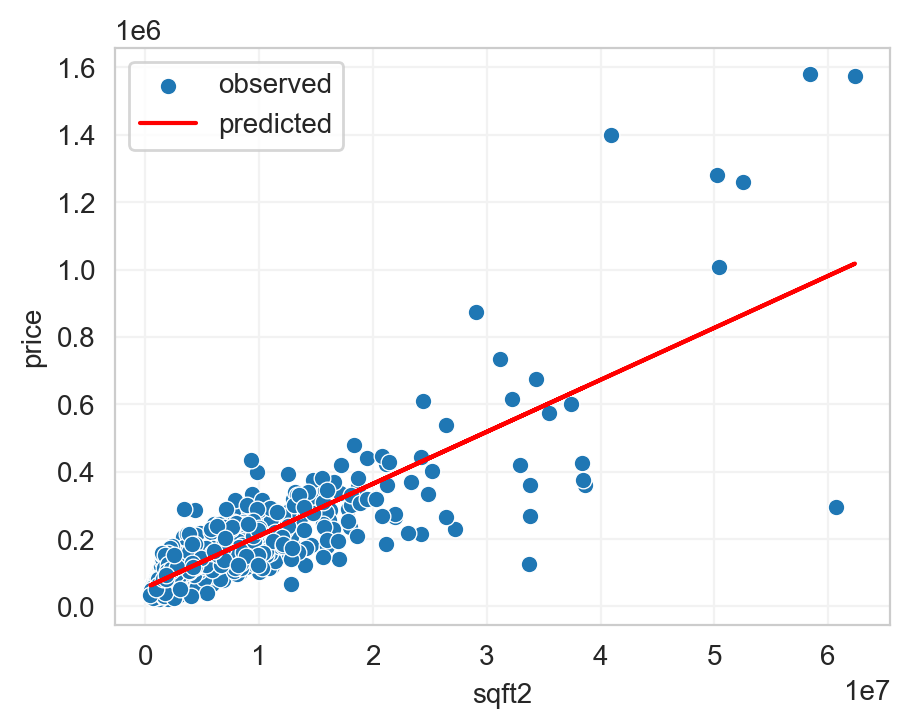

In [24]:
br['sqft2'] = br.sqft**2    # create a new column 'sqft2'
br['const'] = 1
results = sm.OLS(endog=br['price'],exog=br[['const','sqft2']]).fit()

ax = sns.scatterplot(x=br.sqft2,y=br.price,label="observed")
plt.plot(br.sqft2,results.predict(),'r',label="predicted")
plt.legend()

print(results.summary().tables[1])

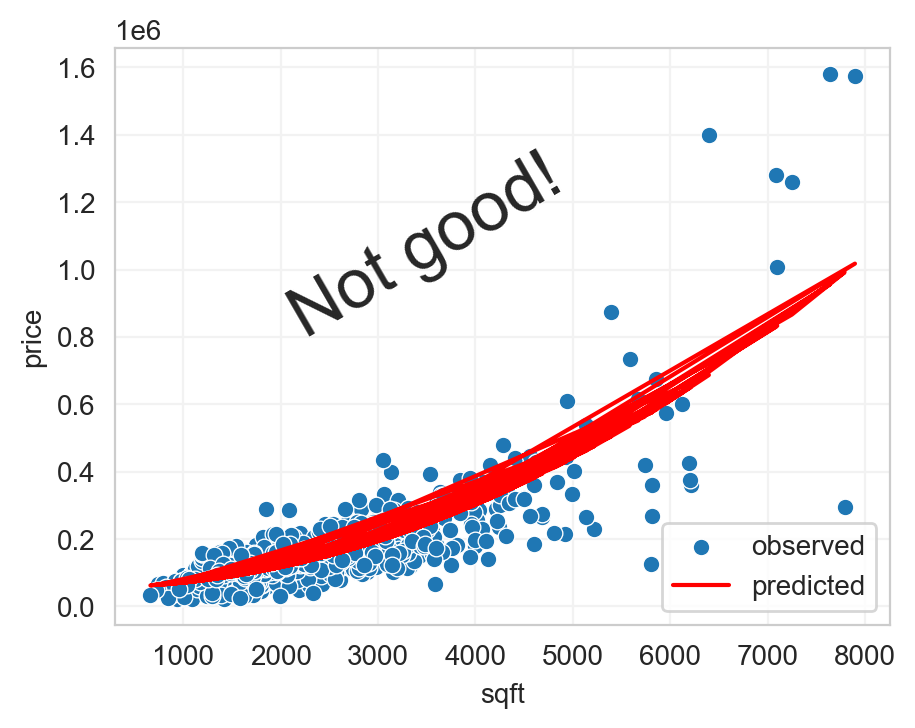

In [25]:
ax = sns.scatterplot(x=br.sqft,y=br.price,label="observed")
plt.plot(br.sqft,results.predict(),'r',label="predicted")
plt.text(2000,800000,"Not good!",fontsize=25,rotation=30)
plt.legend();

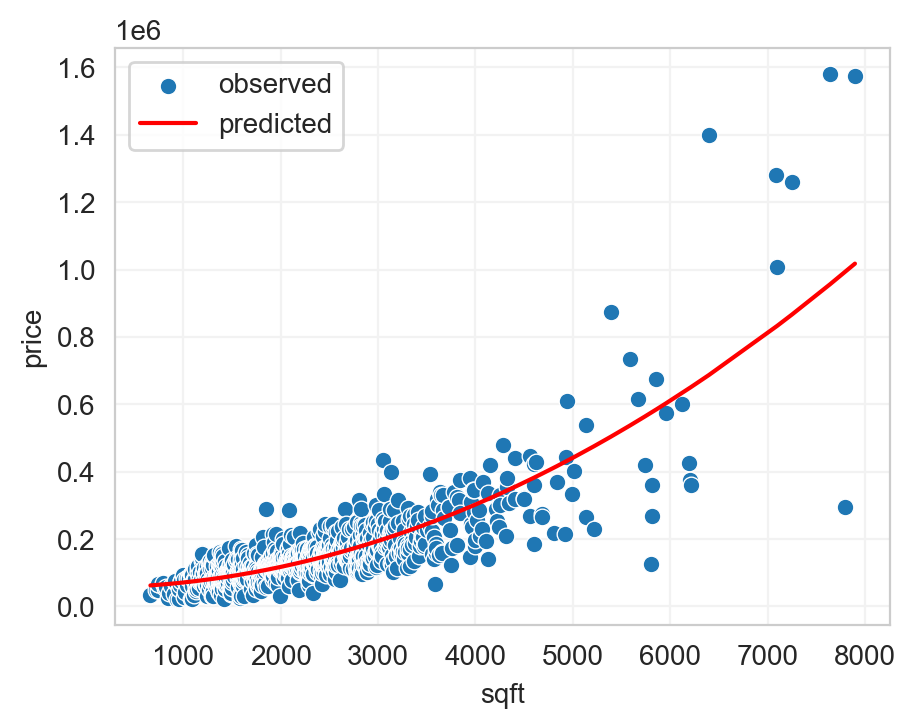

In [26]:
br = pd.read_csv(poe5csv+'br.csv').sort_values(by=['sqft'])
br['sqft2'] = br.sqft**2
br['const'] = 1
results = sm.OLS(endog=br['price'],exog=br[['const','sqft2']]).fit()
ax = sns.scatterplot(x=br.sqft,y=br.price,label="observed")
plt.plot(br.sqft,results.predict(),'r',label="predicted")
plt.legend();    

In [27]:
results.params

const    55776.565641
sqft2        0.015421
dtype: float64

In [28]:
results.bse

const    2890.441213
sqft2       0.000313
dtype: float64

In [29]:
def slope(sqft):
    return 2*results.params.sqft2*sqft

print(f"  Slope at 2000: {slope(2000):6.2f}\n\
  Slope at 4000: {slope(4000):6.2f}\n\
  Slope at 6000: {slope(6000):6.2f}")

  Slope at 2000:  61.69
  Slope at 4000: 123.37
  Slope at 6000: 185.06


In [30]:
def my_predict(sqft):
    return results.params.const + results.params.sqft2*sqft**2

print(f"  Predicted price at 2000: {my_predict(2000):.2f}\n\
  Predicted price at 4000: {my_predict(4000):.2f}\n\
  Predicted price at 6000: {my_predict(6000):.2f}")

  Predicted price at 2000: 117461.77
  Predicted price at 4000: 302517.39
  Predicted price at 6000: 610943.42


In [31]:
def elasticity(sqft):
    beta2 = results.params.sqft2
    return 2*beta2*sqft**2/(results.params.const + beta2*sqft**2)

print(f"  Elasticity at 2000: {elasticity(2000):.2f}\n\
  Elasticity at 4000: {elasticity(4000):.2f}\n\
  Elasticity at 6000: {elasticity(6000):.2f}")

  Elasticity at 2000: 1.05
  Elasticity at 4000: 1.63
  Elasticity at 6000: 1.82


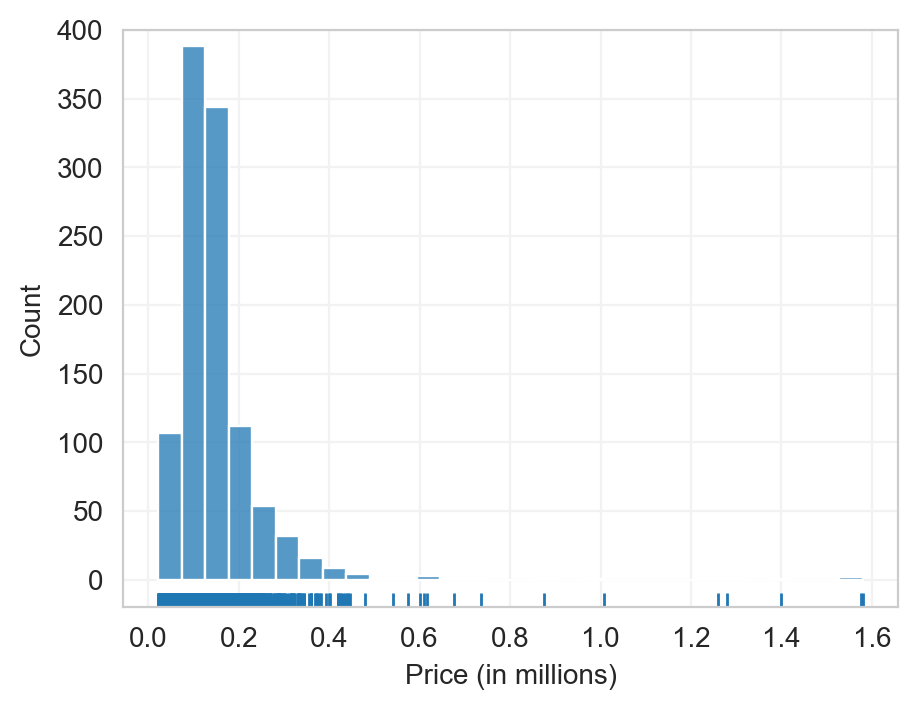

In [32]:
ax = sns.histplot(br.price/1.e6,bins=30)
sns.rugplot(br.price/1.e6,ax=ax)
ax.set_ylim(-20,400)
ax.set_xlabel("Price (in millions)");

In [33]:
import scipy.stats as stats
print(f"Skewness = {stats.skew(br.price):.4f}")
print(f"Kurtosis = {stats.kurtosis(br.price,fisher=False):.4f}")

Skewness = 6.2919
Kurtosis = 60.9498


Skewness = 0.2987
Kurtosis = 5.7614


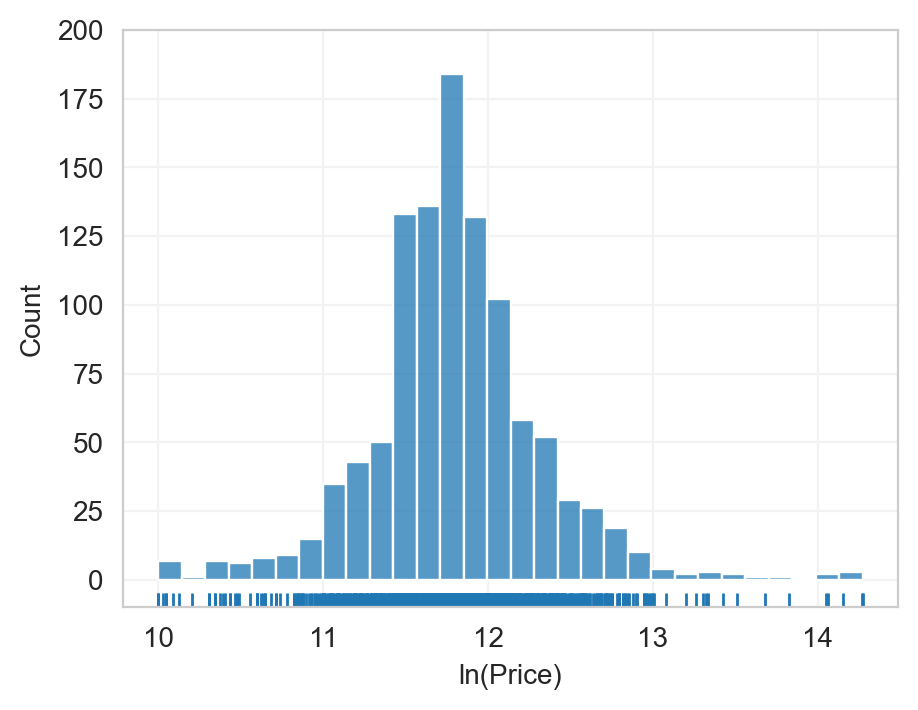

In [34]:
br['ln_price'] = np.log(br.price)
print(f"Skewness = {stats.skew(br.ln_price):.4f}")
print(f"Kurtosis = {stats.kurtosis(br.ln_price,fisher=False):.4f}")

ax = sns.histplot(br.ln_price,bins=30)
sns.rugplot(br.ln_price,ax=ax)
ax.set_ylim(-10,200)
ax.set_xlabel("ln(Price)");

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8386      0.025    440.459      0.000      10.790      10.887
sqft           0.0004   9.71e-06     42.365      0.000       0.000       0.000


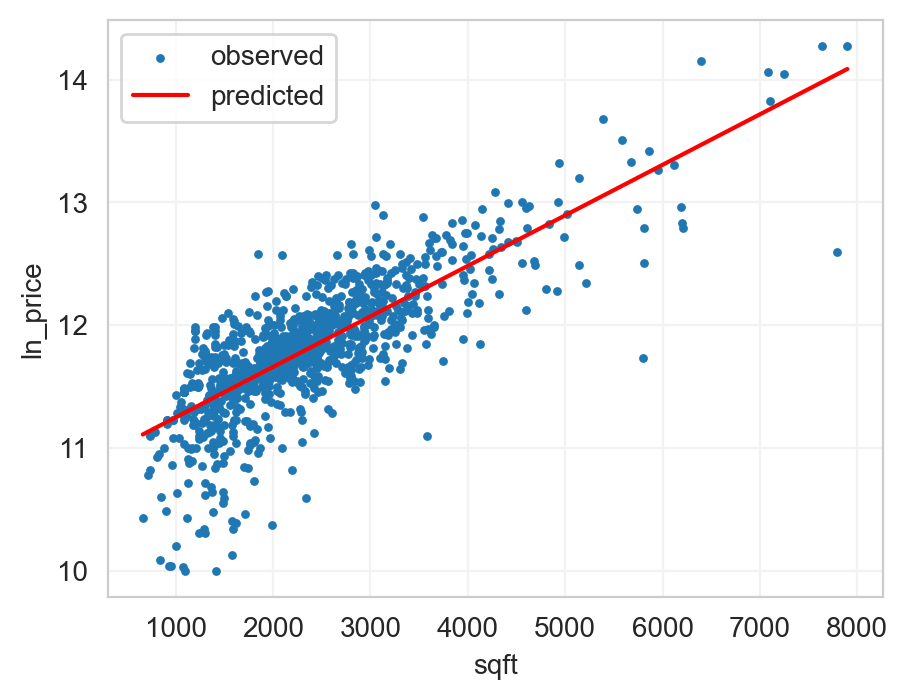

In [35]:
results = sm.OLS(endog=br['ln_price'],exog=br[['const','sqft']]).fit()

ax = sns.scatterplot(x=br.sqft,y=br.ln_price,label="observed",s=10,linewidth=0)
plt.plot(br.sqft,results.predict(),'r',label="predicted")
plt.legend()

print(results.summary().tables[1])

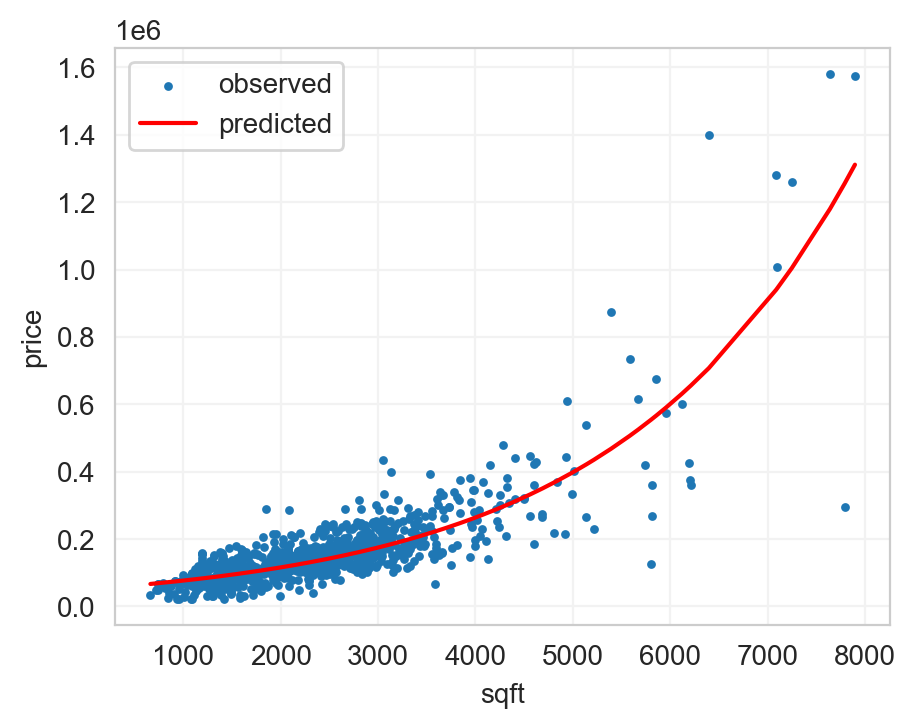

In [36]:
price_fit = np.exp(results.predict())

ax = sns.scatterplot(x=br.sqft,y=br.price,label="observed",s=10,linewidth=0)
plt.plot(br.sqft,price_fit,'r',label="predicted")
plt.legend();

In [37]:
def slope(price):
    return results.params.sqft*price
def elasticity(sqft):
    return results.params.sqft*sqft

for i in [100000,500000]:
    print(f"  Slope at {i}: {slope(i):6.2f}")
for i in [2000,4000]:
    print(f"  Elasticity at {i}: {elasticity(i):.2f}")  

  Slope at 100000:  41.13
  Slope at 500000: 205.63
  Elasticity at 2000: 0.82
  Elasticity at 4000: 1.65


In [38]:
unitown = pd.read_csv(poe5csv+'utown.csv')
print(unitown,'\n')
print(unitown[['price','utown']].describe())

       price   sqft  age  utown  pool  fplace
0    205.452  23.46    6      0     0       1
1    185.328  20.03    5      0     0       1
2    248.422  27.77    6      0     0       0
3    154.690  20.17    1      0     0       0
4    221.801  26.45    0      0     0       1
..       ...    ...  ...    ...   ...     ...
995  257.195  22.84    4      1     0       0
996  338.295  30.00   11      1     0       1
997  263.526  23.99    6      1     0       0
998  300.728  28.74    9      1     0       0
999  220.987  20.93    2      1     0       1

[1000 rows x 6 columns] 

             price        utown
count  1000.000000  1000.000000
mean    247.655721     0.519000
std      42.192729     0.499889
min     134.316000     0.000000
25%     215.646750     0.000000
50%     245.832500     1.000000
75%     278.264500     1.000000
max     345.197000     1.000000


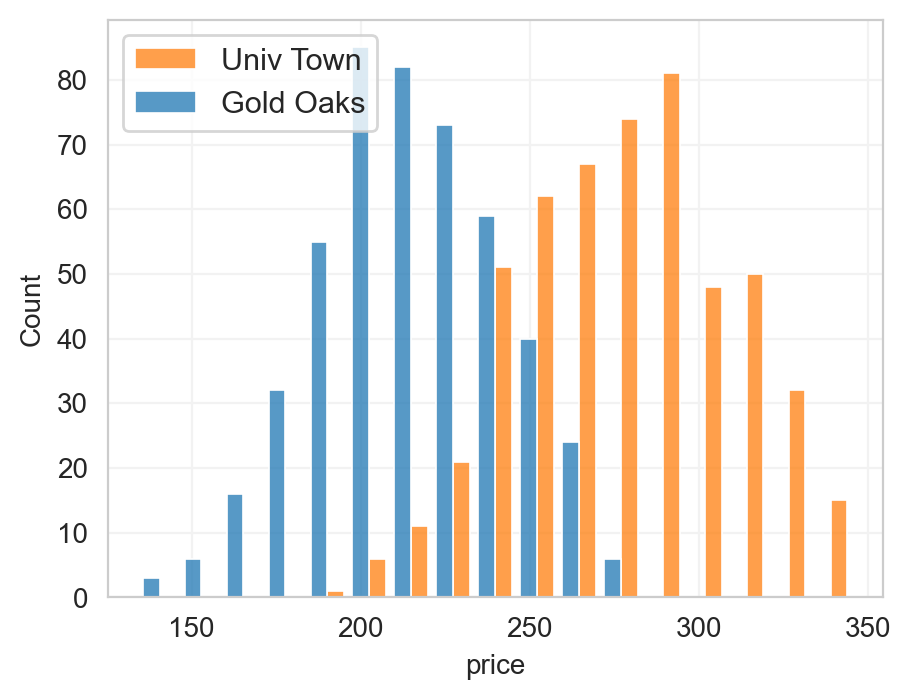

In [39]:
sns.histplot(data=unitown, x="price", hue="utown", multiple="dodge", shrink=0.8)
plt.legend(['Univ Town','Gold Oaks'],loc=2,prop={'size':11});

In [40]:
unitown['const'] = 1
results = sm.OLS(endog=unitown['price'],
                 exog=unitown[['const','utown']]).fit()

print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.7325      1.318    163.673      0.000     213.146     218.319
utown         61.5091      1.830     33.619      0.000      57.919      65.099


In [41]:
from numpy.random import seed, randn

seed(42)             # set for reproducibility

nobs  = 40      
beta1 = 100
beta2 = 10
sigma = 50

# Initialize the DataFrame
mc = pd.DataFrame(columns=['x','y','const'])
mc.x = np.array(20*[10] + 20*[20])            # regressors
mc.y = beta1 + beta2*mc.x + sigma*randn(nobs) 
mc.const = 1

results = sm.OLS(endog=mc['y'],exog=mc[['const','x']]).fit()
                 
print("Single Sample:")
print(f"  Estimated slope:     {results.params.x:6.3f}")
print(f"  Estimated intercept: {results.params.const:6.3f}")

Single Sample:
  Estimated slope:      9.527
  Estimated intercept: 96.169


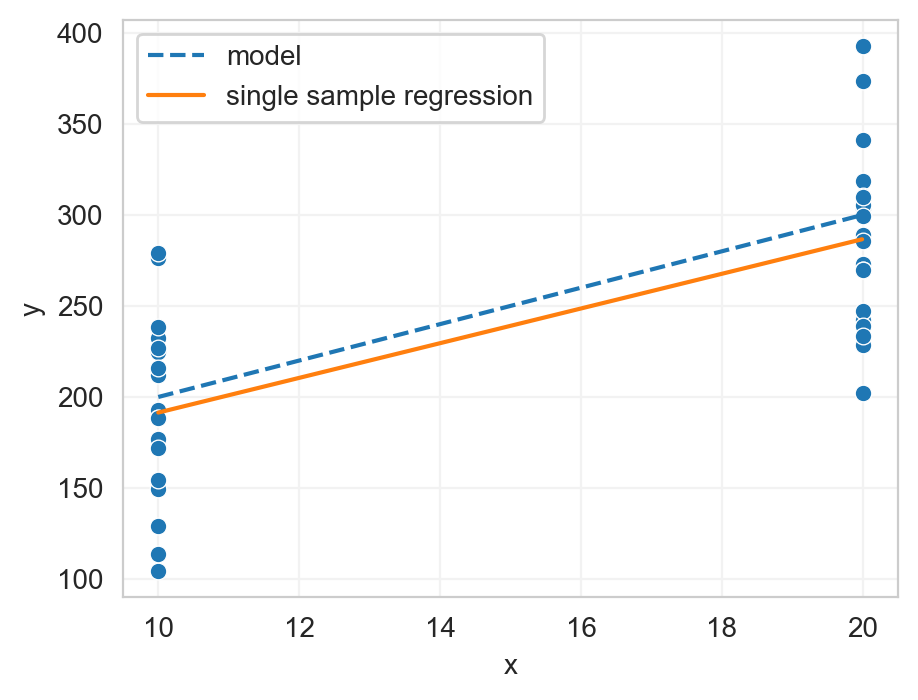

In [42]:
ax = sns.scatterplot(x=mc.x,y=mc.y)
ax.plot([10,20],[200,300],'--',label='model')
slope = results.params.x
intcp = results.params.const
x = np.arange(10,20,0.01)
y = intcp + slope*x
ax.plot(x,y,label='single sample regression')
ax.legend();

In [43]:
seed(42)         # set for reproducibility

nobs  = 40      
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000

intcp     = []  # empty list of estimated beta1 results
slope     = []  # empty list of estimated beta2 results

mc = pd.DataFrame(columns=['x','y','const'])
mc.x = np.array(20*[10] + 20*[20]) 
mc.const = 1

for i in range(nsamples):
    mc.y = beta1 + beta2*mc.x + sigma*randn(nobs)
    results = sm.OLS(endog=mc['y'],exog=mc[['const','x']]).fit()
    slope.append(results.params.x)     # append results to list
    intcp.append(results.params.const) # append results to list
    
slope_mean = np.mean(slope)
intcp_mean = np.mean(intcp)
slope_std  = np.std(slope)
intcp_std  = np.std(intcp)

print(f"Mean intercept = {intcp_mean:.2f}\
  std dev = {intcp_std:5.2f}")
print(f"Mean slope =     {slope_mean:.2f}\
  std dev = {slope_std:5.2f}")

Mean intercept = 99.77  std dev = 24.98
Mean slope =     10.02  std dev =  1.59


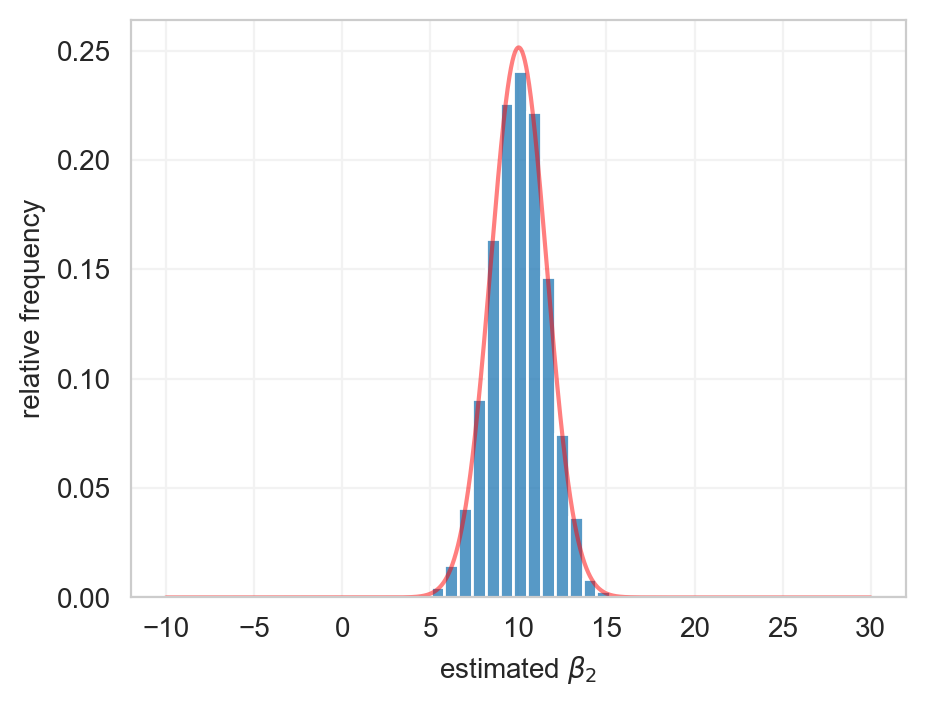

In [44]:
from scipy.stats import norm

ax = sns.histplot(slope,stat='density',bins=15)

x = np.arange(-10.,30.,0.01)
y = norm.pdf(x,slope_mean,slope_std)
ax.plot(x,y,alpha=0.5,color='red')
ax.set_xlabel(r'estimated $\beta_2$')  
ax.set_ylabel('relative frequency');

In [45]:
from numpy.random import seed, randn

seed(42)             # set for reproducibility

nobs  = 40      
beta1 = 100
beta2 = 10
sigma = 50

# Initialize the DataFrame

mc = pd.DataFrame(columns=['x','y','const'])
mc.x = 15 + 1.6 * randn(nobs)                  
mc.y = beta1 + beta2*mc.x + sigma*randn(nobs) 
mc.const = 1

results = sm.OLS(endog=mc['y'],exog=mc[['const','x']]).fit()
                 
print("Single Sample:")
print(f"  Estimated slope:     {results.params.x:7.3f}")
print(f"  Estimated intercept: {results.params.const:7.3f}")

Single Sample:
  Estimated slope:       4.282
  Estimated intercept: 182.319


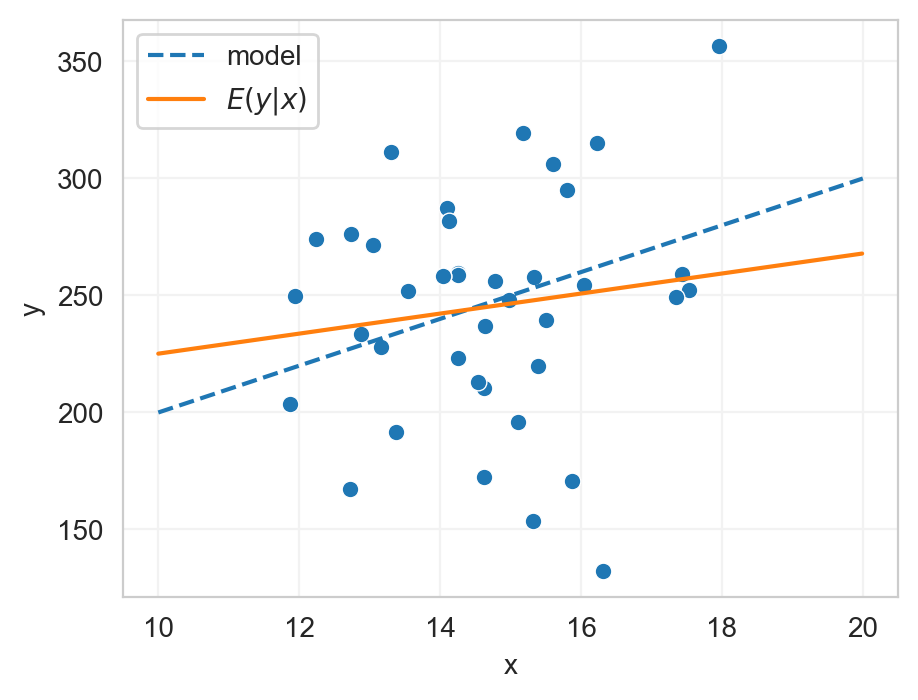

In [46]:
ax = sns.scatterplot(x=mc.x,y=mc.y)
ax.plot([10,20],[200,300],'--',label='model')
slope = results.params.x
intcp = results.params.const
x = np.arange(10,20,0.01)
y = intcp + slope*x
ax.plot(x,y,label='$E(y| x)$')
ax.legend();

In [47]:
from numpy.random import random, rand
seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
intcp     = []  # list of estimated beta1 results
slope     = []  # list of estimated beta2 results
    
for i in range(nsamples):
    mc['x'] = 15 + 1.6 * randn(nobs)
    y = beta1 + beta2*mc.x + sigma*randn(nobs)
    results = sm.OLS(endog=y,exog=mc[['const','x']]).fit()    
    slope.append(results.params.x)     # append to list
    intcp.append(results.params.const) # append to list

slope_mean = np.mean(slope)
intcp_mean = np.mean(intcp)
slope_std  = np.std(slope)
intcp_std  = np.std(intcp)

print(f"Mean intcept = {intcp_mean:5.2f}  std dev = {intcp_std:5.2f}")
print(f"Mean slope =   {slope_mean:5.2f}  std dev = {slope_std:5.2f}")

Mean intcept = 99.85  std dev = 76.75
Mean slope =   10.01  std dev =  5.09


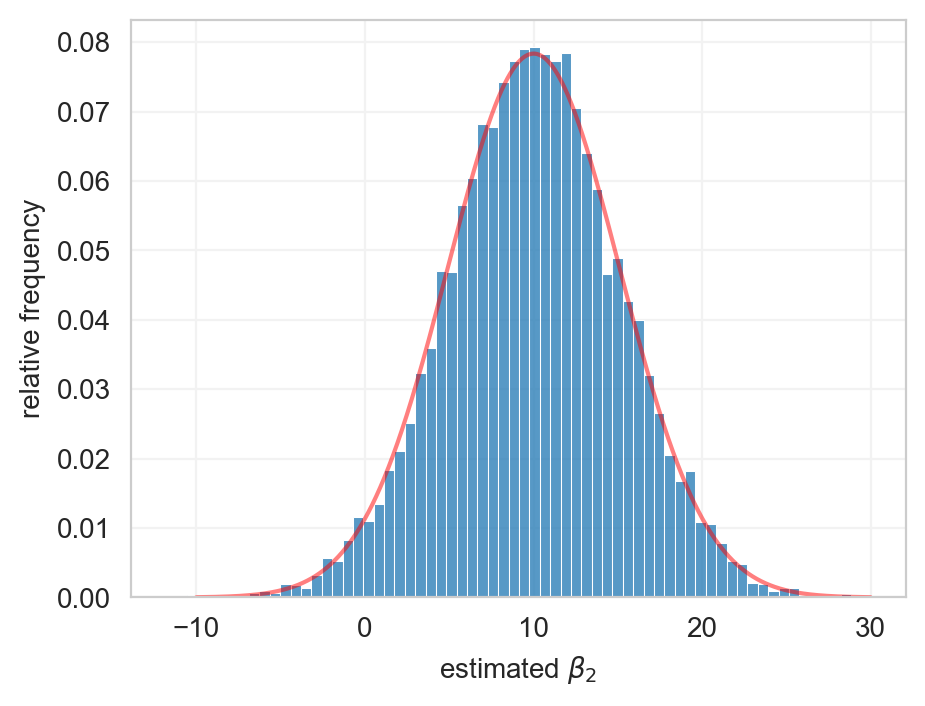

In [48]:
ax = sns.histplot(slope,stat='density')

x = np.arange(-10.,30.,0.01)
y = norm.pdf(x,slope_mean,slope_std)
ax.plot(x,y,alpha=0.5,color='red')
ax.set_xlabel(r'estimated $\beta_2$')  
ax.set_ylabel('relative frequency');